In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
mushroom_data = pd.read_csv(R"C:\Users\Anas\Desktop\Projects for Data Science\mushrooms.csv")

mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
mushroom_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
print('We have', mushroom_data.shape[1],'features with', mushroom_data.shape[0], 'observations')

mushroom_data.describe().T

We have 23 features with 8124 observations


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
print('The dataset has', mushroom_data.isnull().sum().sum(), 'missing points.' )
mushroom_data.isnull().sum()

The dataset has 0 missing points.


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
mushroom_data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Text(0.5, 1.0, 'Edible vs Poisonous mushrooms in Dataset')

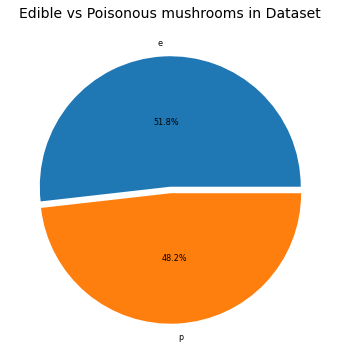

In [9]:
class_data = mushroom_data['class'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = class_data.keys()
plt.pie(x=class_data, autopct="%.1f%%",explode=[0,0.05], labels=labels, pctdistance=0.5)
plt.title("Edible vs Poisonous mushrooms in Dataset", fontsize=14)

In [10]:
X = mushroom_data.copy()
y = X.pop('class')

# Remove useless feature
X = X.drop('veil-type', axis=1)

X = pd.get_dummies(X)
y = pd.factorize(y)

X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
X_temp = mushroom_data.copy().drop('class', axis=1).drop('veil-type', axis=1)
# Find the p values from the chi2 test for each column
chi2_scores = []
chi2_pvalues = []
features_to_drop = []
for i in X_temp.columns:
    dummies = pd.get_dummies(X_temp[i])
    for j in dummies:
        chi_score = chi2_contingency(pd.crosstab(y[0],dummies[j]))[0]
        p_value = chi2_contingency(pd.crosstab(y[0],dummies[j]))[1]*X_temp[i].nunique()
        chi2_scores.append(chi_score)
        chi2_pvalues.append(p_value)
        if p_value > 0.05:
            features_to_drop.append(i+'_'+j)
chi2_scores = pd.Series(chi2_scores, index=X.columns).sort_values(ascending=False)
chi2_scores

odor_n                        5010.142672
odor_f                        3158.863210
stalk-surface-above-ring_k    2802.974198
stalk-surface-below-ring_k    2669.679820
ring-type_p                   2370.911030
                                 ...     
cap-shape_f                      2.712653
stalk-root_b                     2.477984
cap-surface_g                    2.475240
cap-shape_c                      2.475240
stalk-surface-above-ring_y       1.576158
Length: 116, dtype: float64

Text(0.5, 1.0, 'Chi-Squared Scores of Features')

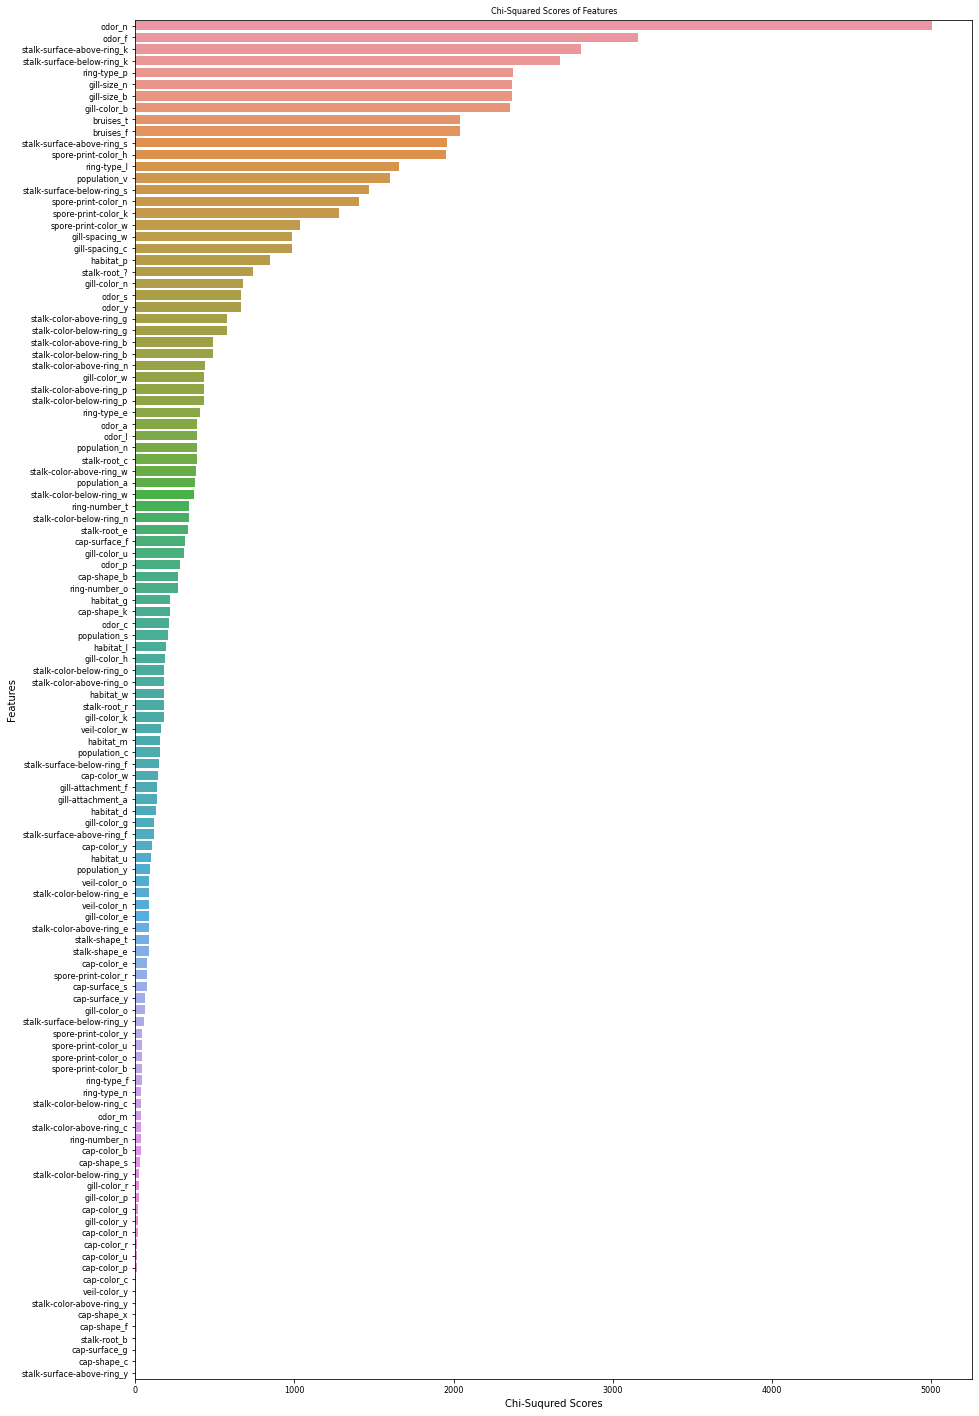

In [12]:
fig , ax = plt.subplots(figsize=(15,25))

sns.barplot(x= chi2_scores , y = chi2_scores.index)

ax.set_xlabel('Chi-Suqured Scores')
ax.set_ylabel('Features')
ax.set_title('Chi-Squared Scores of Features')

In [13]:
features_to_drop

['cap-shape_c',
 'cap-shape_f',
 'cap-shape_x',
 'cap-surface_g',
 'cap-color_c',
 'stalk-root_b',
 'stalk-surface-above-ring_y',
 'stalk-color-above-ring_y']

In [14]:
X_chi2 = X.drop(features_to_drop, axis=1)
X_chi2.head()

,cap-shape_b,cap-shape_k,cap-shape_s,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,cap-color_n,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
mi_scores = mutual_info_classif(X, y[0])
mi_scores = pd.Series(mi_scores, name="MI Scores" , index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

odor_n                        0.368502
odor_f                        0.246704
stalk-surface-above-ring_k    0.198957
gill-color_b                  0.190454
stalk-surface-below-ring_k    0.185429
                                ...   
odor_m                        0.000000
stalk-color-above-ring_y      0.000000
stalk-surface-above-ring_y    0.000000
stalk-surface-above-ring_f    0.000000
cap-color_r                   0.000000
Name: MI Scores, Length: 116, dtype: float64

Text(0.5, 1.0, 'MI Score')

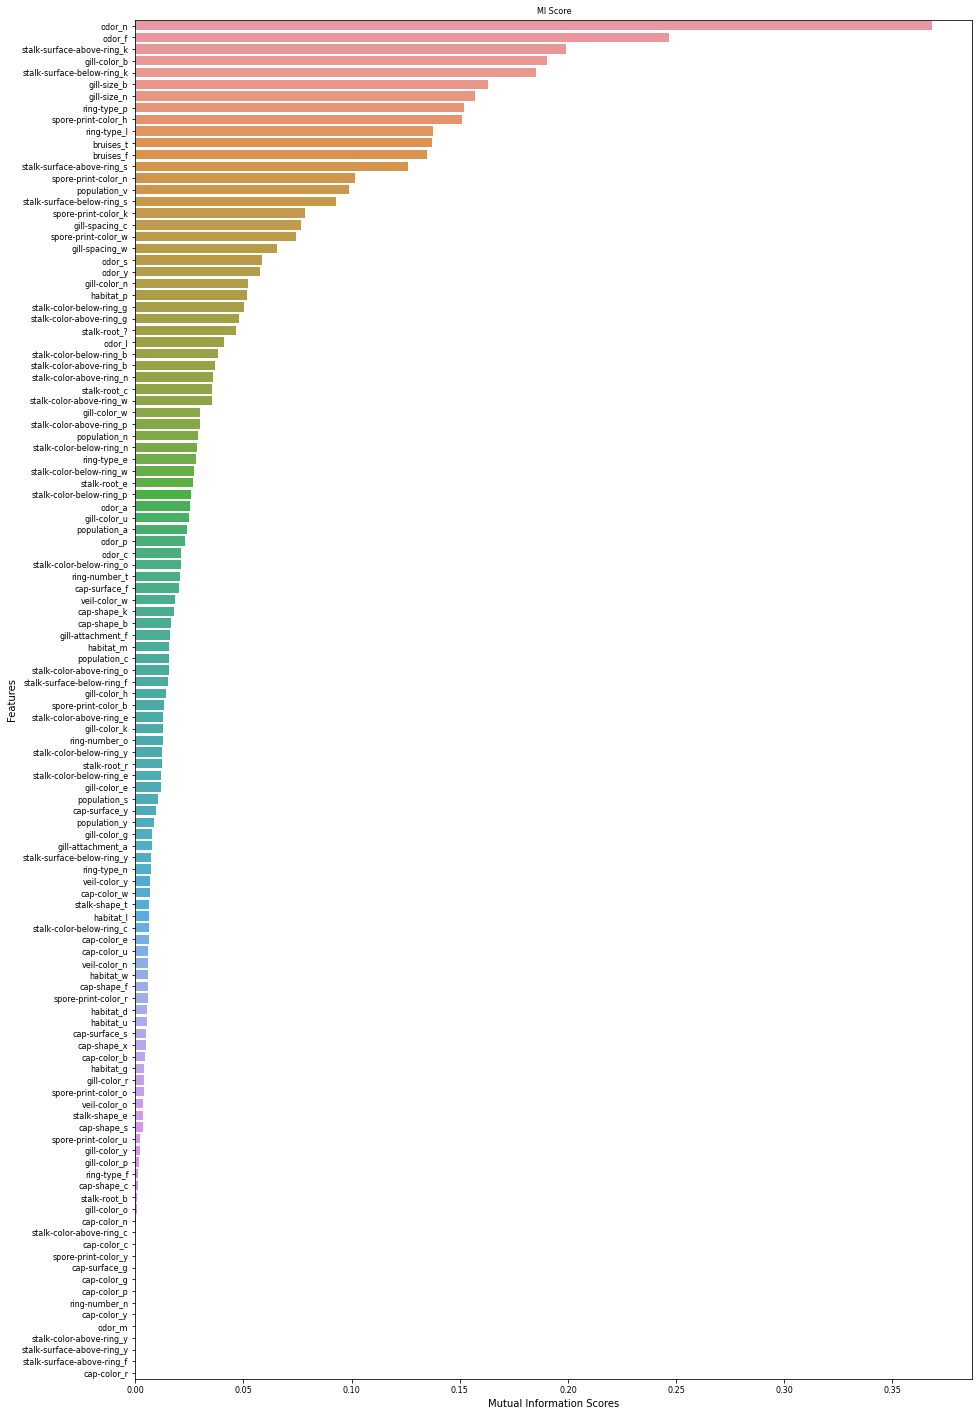

In [16]:
fig, ax = plt.subplots(figsize=(15,25))

sns.barplot(x = mi_scores, y=mi_scores.index)

ax.set_xlabel('Mutual Information Scores')
ax.set_ylabel('Features')
ax.set_title('MI Score')

In [17]:
duplicates = mi_scores.duplicated()

bad_features = [x for x in duplicates.index if (duplicates[x]==True)]
bad_features

['spore-print-color_y',
 'cap-surface_g',
 'cap-color_g',
 'cap-color_p',
 'ring-number_n',
 'cap-color_y',
 'odor_m',
 'stalk-color-above-ring_y',
 'stalk-surface-above-ring_y',
 'stalk-surface-above-ring_f',
 'cap-color_r']

In [18]:
X_mi = X.drop(bad_features, axis=1)
X_mi.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_b,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
common_bad_features = set(features_to_drop) & set(bad_features)
common_bad_features

{'cap-surface_g', 'stalk-color-above-ring_y', 'stalk-surface-above-ring_y'}

In [24]:
# Separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y[0], test_size=0.25, random_state=0)

# Baseline Random Forest with default parameters
model = RandomForestClassifier(random_state=0)
fit = model.fit(X_train, y_train)
predictions = fit.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       970
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [25]:
score = cross_val_score(
         model , X, y[0], cv=5, scoring='accuracy'
)
print('Average accuracy of base model:', score.mean())

Average accuracy of base model: 0.9257583175445244


In [26]:
Xchi_train , Xchi_test, y_train, y_test = train_test_split(X_chi2, y[0], test_size=0.25,
    random_state=0)

fit_chi = model.fit(Xchi_train, y_train)
predictions_chi = fit_chi.predict(Xchi_test)
print(classification_report(predictions_chi, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       970
           1       1.00      1.00      1.00      1061

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [28]:
score = cross_val_score(
     model, X_chi2, y[0], cv=5, scoring='accuracy'
)

print('Average accuracymof chi2 model:', score.mean())

Average accuracymof chi2 model: 0.9173839333080712


In [33]:
score = cross_val_score(
    model, X_mi, y[0], cv=5 , scoring = 'accuracy'
) 

print('Average accuracy of MI model: ' ,score.mean())

Average accuracy of MI model:  0.9204627510420614


In [38]:
model_50 = RandomForestClassifier(n_estimators=50, random_state=0)

score = cross_val_score(
    model_50, X, y[0], cv=5, scoring='accuracy'
)

print('Average accuracy of base model (50 trees):', score.mean())


score = cross_val_score(
     model_50, X_chi2, y[0], cv=5, scoring = 'accuracy'
)
print('Average accuracy of chi2 model (50 tress):', score.mean())

score = cross_val_score(
     model_50, X_mi, y[0], cv=5, scoring='accuracy'
)
print('Average accuary of MI model (50 trees):', score.mean())

Average accuracy of base model (50 trees): 0.9332706328154604
Average accuracy of chi2 model (50 tress): 0.9219405835543768
Average accuary of MI model (50 trees): 0.9245267904509283


In [42]:
n_estimators = [10,20,30,40,50,60,70,80,90,100]
mean_scores = []
for i in n_estimators:
    model = RandomForestClassifier(n_estimators=i, random_state=0)
    score = cross_val_score(
    model, X_mi , y[0], cv=5 , scoring='accuracy'
    )
    mean_scores.append(score.mean())
    print('Aveage accuracy of MI model (',i,'trees):',score.mean())

Aveage accuracy of MI model ( 10 trees): 0.9200913224706329
Aveage accuracy of MI model ( 20 trees): 0.9380735884804852
Aveage accuracy of MI model ( 30 trees): 0.925881470253884
Aveage accuracy of MI model ( 40 trees): 0.9241573323228496
Aveage accuracy of MI model ( 50 trees): 0.9245267904509283
Aveage accuracy of MI model ( 60 trees): 0.9239110269041303
Aveage accuracy of MI model ( 70 trees): 0.9251425539977264
Aveage accuracy of MI model ( 80 trees): 0.9248962485790072
Aveage accuracy of MI model ( 90 trees): 0.9247730958696476
Aveage accuracy of MI model ( 100 trees): 0.9204627510420614


Text(0.5, 1.0, 'Accuracy of different n_estimators (5 fold CV)')

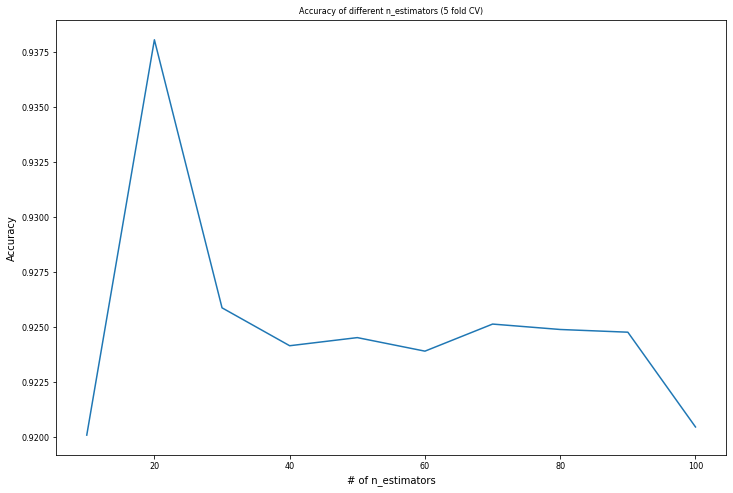

In [45]:
mean_scores = pd.Series(mean_scores, index=n_estimators)

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x = mean_scores.index, y=mean_scores)

ax.set_ylabel('Accuracy')
ax.set_xlabel('# of n_estimators')
ax.set_title('Accuracy of different n_estimators (5 fold CV)')